In [1]:
#Objective:
# val acc ~72% normally on a small dataset
#To counter over-fitting, use dropout (?), weight decay (L2 regularization) and data augmentation
# val acc due to drop out and augmentation increased to ~82
# next to further improve: use a pre-trained convnet model!
# A pre-trained model, trained on a larger set. A generic model develops features that can
#be used even on a small data problem
#2 ways to use it: 1) feature extraction 2 options 2) fine-tuning
#we are using VGG16 pre-trained model architechture (ResNet, Inception, Xception etc are others)

In [ ]:
#THIS IS SMALL CONVNET EXAMPLE

In [1]:
#System Check
import sys;print('python version:',sys.version) 
import tensorflow as tf;print('tf_version:',tf.__version__) #tf: 2.1 
from tensorflow import keras; print('keras version:',keras.__version__) 
import keras 
print("keras version on its own:",keras.__version__) #tf keras and keras library can have different versions
from tensorflow.python.platform import build_info as tf_build_info 
#print('CUDA Version:',tf_build_info.cuda_version_number) 
#print('CUDNN Version:',tf_build_info.cudnn_version_number)

import tensorflow as tf
tf.test.is_gpu_available() # True/False
print("GPU Status:",tf.test.is_gpu_available())

#Releases the python gpu memory
from numba import cuda
cuda.select_device(0)
cuda.close()

"""
# Or only check for gpu's with cuda support
tf.test.is_gpu_available(cuda_only=True) 
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
"""

python version: 3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 21:14:29) 
[GCC 7.3.0]
tf_version: 1.14.0
keras version: 2.2.4-tf
keras version on its own: 2.2.4
GPU Status: False


Using TensorFlow backend.


"\n# Or only check for gpu's with cuda support\ntf.test.is_gpu_available(cuda_only=True) \nfrom tensorflow.python.client import device_lib\nprint(device_lib.list_local_devices())\n"

In [46]:
import os, shutil

#img_folder
original_dataset_dir='/home/oj/Downloads/4types_images/all_2'



####Create train, validation and test folders and sub-folders. Keras needs sub-folders:https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
# Create a Test Dir##### #create a folder "train": os.path.join gets path and the name of the new directory#os.mkdir(directory_name_path) makes it#You have to error check whether the folder already exist

############Create High level train, val and test folders and sub-folders####
train_dir = os.path.join(original_dataset_dir, 'train') 
if os.path.exists(train_dir):
    pass #does nothing
else :
    os.mkdir(train_dir)

train_sub_dir = os.path.join(train_dir, 'train_sub') 
if os.path.exists(train_sub_dir):
    pass #does nothing
else :
    os.mkdir(train_sub_dir)
    
# #####Create a Validation Dir#####
validation_dir = os.path.join(original_dataset_dir, 'validation') 
if os.path.exists(validation_dir):
    pass #does nothing
else :
    os.mkdir(validation_dir)

validation_sub_dir = os.path.join(validation_dir, 'validation_sub') 
if os.path.exists(validation_sub_dir):
    pass #does nothing
else :
    os.mkdir(validation_sub_dir)

####Create a Test Dir#####
test_dir = os.path.join(original_dataset_dir, 'test') 
if os.path.exists(test_dir):
    pass #does nothing
else :
    os.mkdir(test_dir)

test_sub_dir = os.path.join(test_dir, 'test_sub') 
if os.path.exists(test_sub_dir):
    pass #does nothing
else :
    os.mkdir(test_sub_dir)
    
#####################################sub-directories of each type######

############################## 4 training folders ###################   
# Directory with our training incertum pictures
train_incertum_dir = os.path.join(train_sub_dir, 'incertum')
#os.mkdir(train_incertum_dir)

# Directory with our training latericium pictures
train_latericium_dir = os.path.join(train_sub_dir, 'latericium')
#os.mkdir(train_latericium_dir)
    

    
# Directory with our training vittatum_mixtumpictures
train_vittatum_mixtum_dir = os.path.join(train_sub_dir, 'vittatum_mixtum')
#os.mkdir(train_vittatum_mixtum_dir)


############################## 4 validation folders ###################   
# Directory with our training incertum pictures
validation_incertum_dir = os.path.join(validation_sub_dir, 'incertum')
#os.mkdir(validation_incertum_dir)

# Directory with our training latericium pictures
validation_latericium_dir = os.path.join(validation_sub_dir, 'latericium')
#os.mkdir(validation_latericium_dir)
    

# Directory with our training vittatum_mixtump pictures
validation_vittatum_mixtum_dir = os.path.join(validation_sub_dir, 'vittatum_mixtum')
#os.mkdir(validation_vittatum_mixtum_dir)


############################## 4 test folders ###################      
# Directory with our training incertum pictures
test_incertum_dir = os.path.join(test_sub_dir, 'incertum')
#os.mkdir(test_incertum_dir)

# Directory with our training latericium pictures
test_latericium_dir = os.path.join(test_sub_dir, 'latericium')
#os.mkdir(test_latericium_dir)
    

    
# Directory with our training vittatum_mixtump pictures
test_vittatum_mixtum_dir = os.path.join(test_sub_dir, 'vittatum_mixtum')
#os.mkdir(test_vittatum_mixtum_dir)




In [6]:
####5.2.2 - Images are Not Randomly Saved. Copies images from main folder to respective train,val and test #####


#################incertum#########################3
#Train
fnames = ['incertum{}.jpg'.format(i) for i in range(1,161)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_incertum_dir, fname)
    shutil.copyfile(src, dst)
#Validation
fnames = ['incertum{}.jpg'.format(i) for i in range(161,181)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_incertum_dir, fname)
    shutil.copyfile(src, dst)
#Test
fnames = ['incertum{}.jpg'.format(i) for i in range(181,201)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_incertum_dir, fname)
    shutil.copyfile(src, dst)

print('incertum train images: ',len(os.listdir(train_incertum_dir)))
print('incertum val images: ',len(os.listdir(validation_incertum_dir)))
print('incertum test images: ',len(os.listdir(test_incertum_dir)))

#################latericium#########################3
#Train
fnames = ['latericium{}.jpg'.format(i) for i in range(1,41)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_latericium_dir, fname)
    shutil.copyfile(src, dst)
#Validation
fnames = ['latericium{}.jpg'.format(i) for i in range(41,51)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_latericium_dir, fname)
    shutil.copyfile(src, dst)
#Test
fnames = ['latericium{}.jpg'.format(i) for i in range(51,61)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_latericium_dir, fname)
    shutil.copyfile(src, dst)

print('latericium train images: ',len(os.listdir(train_latericium_dir)))
print('latericium val images: ',len(os.listdir(validation_latericium_dir)))
print('latericium test images: ',len(os.listdir(test_latericium_dir)))


#################vittatum#########################3
#Train
fnames = ['vittatum{}.jpg'.format(i) for i in range(1,18)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_vittatum_dir, fname)
    shutil.copyfile(src, dst)
#Validation
fnames = ['vittatum{}.jpg'.format(i) for i in range(18,22)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_vittatum_dir, fname)
    shutil.copyfile(src, dst)
#Test
fnames = ['vittatum{}.jpg'.format(i) for i in range(22,26)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_vittatum_dir, fname)
    shutil.copyfile(src, dst)

print('vittatum train images: ',len(os.listdir(train_vittatum_dir)))
print('vittatum val images: ',len(os.listdir(validation_vittatum_dir)))
print('vittatum test images: ',len(os.listdir(test_vittatum_dir)))


#################vittatum_mixtum#########################3
#Train
fnames = ['vittatum_mixtum{}.jpg'.format(i) for i in range(1,32)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_vittatum_mixtum_dir, fname)
    shutil.copyfile(src, dst)
#Validation
fnames = ['vittatum_mixtum{}.jpg'.format(i) for i in range(32,36)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_vittatum_mixtum_dir, fname)
    shutil.copyfile(src, dst)
#Test
fnames = ['vittatum_mixtum{}.jpg'.format(i) for i in range(36,40)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_vittatum_mixtum_dir, fname)
    shutil.copyfile(src, dst)

print('vittatum_mixtum train images: ',len(os.listdir(train_vittatum_mixtum_dir)))
print('vittatum_mixtum val images: ',len(os.listdir(validation_vittatum_mixtum_dir)))
print('vittatum_mixtum test images: ',len(os.listdir(test_vittatum_mixtum_dir)))


FileNotFoundError: [Errno 2] No such file or directory: '/home/oj/Downloads/4types_images/all/incertum1.jpg'

In [48]:
#Model
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3))) #input shape is arbitray choice. The actual cat/dog images are greather than this size
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #one more convnet and max pooling layer from 5.1 example. This augments the network and resuces the size of the feature map so they are not too large when they reach the flatten layer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) #network of 512 dense layers
model.add(layers.Dense(2, activation='softmax')) #4 different types
model.summary() #depth of the feature map is increasing from 32 to 128 but the size is decreasing from 148*148 to 7*7

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [49]:
#model compile: setting the loss function; optimizer
from keras import optimizers
"""
#Making network/model ready for training
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy']) #Metrics to monitor during training and testing—Here, we’ll only care about accuracy(the fraction of the images that were correctly classified).
"""
"""
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
"""

"\nmodel.compile(optimizer='rmsprop',\n                loss='categorical_crossentropy',\n                metrics=['accuracy'])\n"

In [50]:
#Data pre-processing. Requires following:
#jpg>RGB channels>floating point tensors> normalize or rescale the pixel values from 0-255 to [0,1]
#Keras' IamgeDataGenerator class takes care of that
#by this step, should give you the input image as a tensor and associated labels for training

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_sub_dir, # This is the target directory
        target_size=(150, 150),# All images will be resized to 150x150
        batch_size=10, #every epoch, 2000 images are drawn in a batch of 20, 100 times
        #class_mode='binary') # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical') # <---
    
validation_generator = test_datagen.flow_from_directory(
        validation_sub_dir,
        target_size=(150, 150),
        batch_size=10,
        #class_mode='binary')
        class_mode='categorical') #<----
    
#check output of the tensors
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape) #output is x samples of 150x150*RGB. where x is the batch size
    print('labels batch shape:', labels_batch.shape) # for binary, label shape = (batch size,); for categorical(batch size, )
    break

Found 200 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 2)


In [51]:
#fitting the data (answers, input images) into the model/network is the same as training it
history = model.fit_generator( #model.fit - we name it history? interesting
      train_generator, #aboove train generator
      steps_per_epoch=5, #samples per epoch. total train_images/batch_size. Our case 2000/20=100; 2000 is cat+dog; takes these many gradien steps before going to the next epoch
      epochs=30,
      validation_data=validation_generator, #can be tuple or a data generator; but if latter then you should specify val_steps that tell the process how many batches to draw from the validation generator; otherwise, goes on forever
      validation_steps=5)

Epoch 1/30
5/5 [==============================] - 1s 269ms/step - loss: 0.5596 - acc: 0.7200 - val_loss: 0.7079 - val_acc: 0.6600
Epoch 2/30
5/5 [==============================] - 1s 149ms/step - loss: 0.5598 - acc: 0.7600 - val_loss: 0.6282 - val_acc: 0.7000
Epoch 3/30
5/5 [==============================] - 1s 159ms/step - loss: 0.5213 - acc: 0.8200 - val_loss: 0.7522 - val_acc: 0.6400
Epoch 4/30
5/5 [==============================] - 1s 179ms/step - loss: 0.5649 - acc: 0.7600 - val_loss: 0.7514 - val_acc: 0.6400
Epoch 5/30
5/5 [==============================] - 1s 192ms/step - loss: 0.4135 - acc: 0.8400 - val_loss: 0.9004 - val_acc: 0.6600
Epoch 6/30
5/5 [==============================] - 1s 190ms/step - loss: 0.7379 - acc: 0.7000 - val_loss: 0.6260 - val_acc: 0.7000
Epoch 7/30
5/5 [==============================] - 1s 193ms/step - loss: 0.3698 - acc: 0.9000 - val_loss: 0.8377 - val_acc: 0.6600
Epoch 8/30
5/5 [==============================] - 1s 195ms/step - loss: 0.5763 - acc: 0.72

In [60]:
#Save ya model - good practice
model.save('opus_4_classes_small_convnet.h5')
model.save_weights('opus_4_classes_small_convnet_weights.h5')

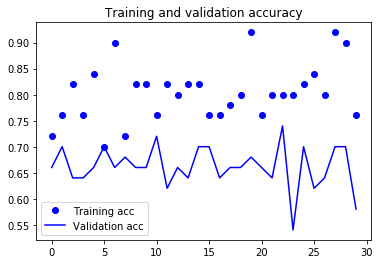

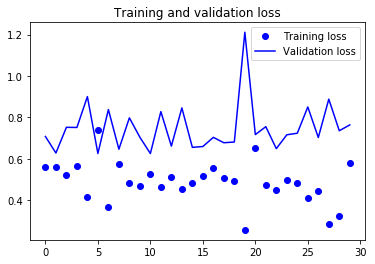

In [52]:
#plot the loss and accuracy of the model over the training and validation data during training

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
#0.1 in y-axis is 10%; x-axis=epochs
#This plot is characteristic of over-fitting.
#Validation accuracy caps at 0.7 and loss increases over the epochs. 
#Why do we not see that with training? Is it because training images 2000 are double in number 1000?
#To couter over-fitting, use dropout, weight decay (L2 regularization) and data augmentation

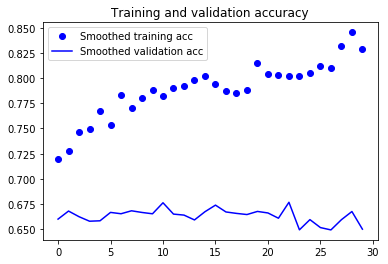

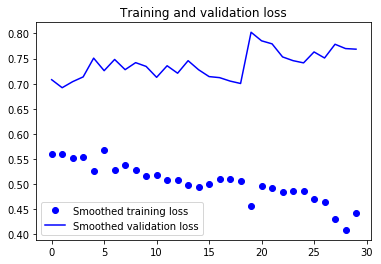

In [53]:
#making above graphs smoother. This is done by replacing every loss and accuracy with exponential moving averages
#This is for readability

def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [54]:
test_generator = test_datagen.flow_from_directory(
        test_sub_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 30 images belonging to 2 classes.
test acc: 0.6640000140666962


In [55]:
test_generator = test_datagen.flow_from_directory(
        validation_sub_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('validation acc:', test_acc)

Found 30 images belonging to 2 classes.
validation acc: 0.6360000133514404


# dataAugmentation and dropout layer
Randomly Drop Nodes
Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel.

During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.

By dropping a unit out, we mean temporarily removing it from the network, along with all its incoming and outgoing connections

In [56]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

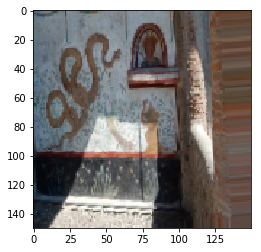

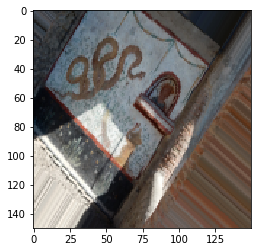

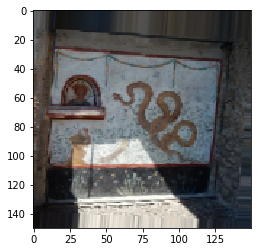

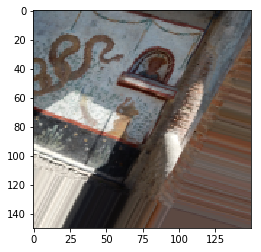

In [59]:
import os, shutil

import matplotlib.pyplot as plt
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_latericium_dir, fname) for fname in os.listdir(train_latericium_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [63]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [64]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_sub_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_sub_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical')

#check output of the tensors
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape) #output is x samples of 150x150*RGB. where x is the batch size
    print('labels batch shape:', labels_batch.shape) # for binary, label shape = (batch size,); for categorical(batch size, )
    break

Found 200 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 2)


In [65]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=20)

Epoch 1/30
20/20 [==============================] - 5s 272ms/step - loss: 0.5541 - acc: 0.7850 - val_loss: 0.6608 - val_acc: 0.6750
Epoch 2/30
20/20 [==============================] - 4s 224ms/step - loss: 0.5229 - acc: 0.8050 - val_loss: 0.7875 - val_acc: 0.6600
Epoch 3/30
20/20 [==============================] - 5s 227ms/step - loss: 0.5263 - acc: 0.8000 - val_loss: 0.7339 - val_acc: 0.6650
Epoch 4/30
20/20 [==============================] - 5s 234ms/step - loss: 0.5275 - acc: 0.8000 - val_loss: 0.7311 - val_acc: 0.6550
Epoch 5/30
20/20 [==============================] - 5s 232ms/step - loss: 0.5125 - acc: 0.8050 - val_loss: 0.7527 - val_acc: 0.6850
Epoch 6/30
20/20 [==============================] - 5s 235ms/step - loss: 0.5333 - acc: 0.7800 - val_loss: 0.6379 - val_acc: 0.6600
Epoch 7/30
20/20 [==============================] - 5s 237ms/step - loss: 0.5026 - acc: 0.8100 - val_loss: 0.7043 - val_acc: 0.6700
Epoch 8/30
20/20 [==============================] - 5s 241ms/step - loss: 0.

In [68]:
#Save ya model - good practice
model.save('opus_4_classes_small_convnet_waug_dropout.h5')
model.save_weights('weights_opus_4_classes_small_convnet_waug_dropout.h5')

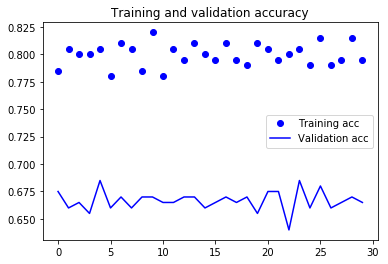

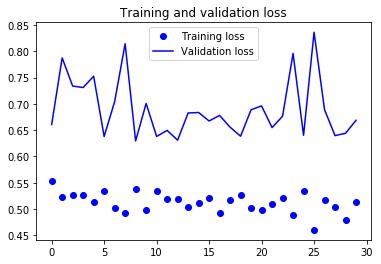

In [66]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

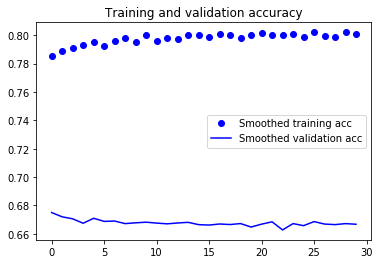

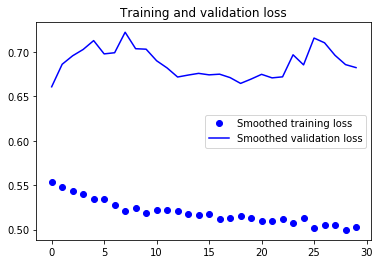

In [67]:
#making above graphs smoother. This is done by replacing every loss and accuracy with exponential moving averages
#This is for readability

def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [69]:
test_generator = test_datagen.flow_from_directory(
        test_sub_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 30 images belonging to 2 classes.
test acc: 0.6640000143647193
